In [96]:
import os
from os import listdir
from os.path import isfile, join, dirname, basename
import pandas as pd

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import matplotlib.gridspec as gridspec

In [99]:
%run analysis_utils.py

<Figure size 640x480 with 0 Axes>

In [100]:
def find_finetune_folders(base_dir):

    finetune_folders = []
    print(base_dir)
    for dirpath, dirnames, filenames in os.walk(base_dir):
        for dirname in dirnames:
            if "finetune" in dirname.lower():
                full_path = os.path.join(dirpath,dirname )
                parent_folder = os.path.basename(dirpath)
                finetune_folders.append((parent_folder, dirname, full_path))
    
    return finetune_folders

In [101]:
def read_metric(dir_path):
    metrics_file_path = os.path.join(dir_path, f'cv/votecv_metrics_mean.csv')
    # print(metrics_file_path)
    metric_value = None
    if os.path.isfile(metrics_file_path):
        try:
            df = pd.read_csv(metrics_file_path, index_col=0)
            metric_value = df[df.index=='AUPRC'].values[0][0]
            # print(metric_value)
        except Exception as e:
            print(f"Failed to read {metrics_file_path}: {e}")
    return metric_value

In [102]:
# # get finetuned metrics

In [103]:
base_dir = '/home/jupyter/mnt/__output_clean'
folders = find_finetune_folders(base_dir)
df = pd.DataFrame(folders, columns =['experiment_name', 'experiment', 'full_path'])
df['mean'] = df.full_path.map(read_metric)
df =df.dropna()
df

/home/jupyter/mnt/__output_clean


,experiment_name,experiment,full_path,mean
1,chemo,gf-6L-30M-i2048_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/che...,0.403333
7,chemo,Geneformer-V2-104M_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/che...,0.678571
8,chemo,gf-6L-30M-i2048_finetune,/home/jupyter/mnt/__output_clean/brca_full/che...,0.396667
10,subtype,gf-6L-30M-i2048_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/sub...,1.000000
14,subtype,Geneformer-V2-104M_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/sub...,0.966667
16,pre_post,gf-6L-30M-i2048_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/pre...,1.000000
19,pre_post,Geneformer-V2-104M_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/pre...,1.000000
21,outcome,gf-6L-30M-i2048_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/out...,0.773333
24,outcome,Geneformer-V2-104M_finetune_original,/home/jupyter/mnt/__output_clean/brca_full/out...,0.666667
30,luad2,gf-6L-30M-i2048_finetune_original,/home/jupyter/mnt/__output_clean/luad2/gf-6L-3...,1.000000


In [104]:
df = df[df.experiment.str.contains('original')]
df['experiment'] = df.experiment.str.replace('_original', '')

/var/tmp/ipykernel_10387/1724320102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experiment'] = df.experiment.str.replace('_original', '')


In [105]:
df.experiment.str.replace('_original', '')

1        gf-6L-30M-i2048_finetune
7     Geneformer-V2-104M_finetune
10       gf-6L-30M-i2048_finetune
14    Geneformer-V2-104M_finetune
16       gf-6L-30M-i2048_finetune
19    Geneformer-V2-104M_finetune
21       gf-6L-30M-i2048_finetune
24    Geneformer-V2-104M_finetune
30       gf-6L-30M-i2048_finetune
34    Geneformer-V2-104M_finetune
Name: experiment, dtype: object

In [106]:
df['group'] = df.experiment.map(map_groups)
df = df.drop('full_path', axis=1)
df_finetune = df
df_finetune

/var/tmp/ipykernel_10387/2713648330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df.experiment.map(map_groups)


,experiment_name,experiment,mean,group
1,chemo,gf-6L-30M-i2048_finetune,0.403333,Geneformer
7,chemo,Geneformer-V2-104M_finetune,0.678571,Geneformer
10,subtype,gf-6L-30M-i2048_finetune,1.000000,Geneformer
14,subtype,Geneformer-V2-104M_finetune,0.966667,Geneformer
16,pre_post,gf-6L-30M-i2048_finetune,1.000000,Geneformer
19,pre_post,Geneformer-V2-104M_finetune,1.000000,Geneformer
21,outcome,gf-6L-30M-i2048_finetune,0.773333,Geneformer
24,outcome,Geneformer-V2-104M_finetune,0.666667,Geneformer
30,luad2,gf-6L-30M-i2048_finetune,1.000000,Geneformer
34,luad2,Geneformer-V2-104M_finetune,1.000000,Geneformer


In [107]:
df_finetune=df_finetune[~df_finetune.experiment.str.contains('freez')]

In [108]:
df_finetune

,experiment_name,experiment,mean,group
1,chemo,gf-6L-30M-i2048_finetune,0.403333,Geneformer
7,chemo,Geneformer-V2-104M_finetune,0.678571,Geneformer
10,subtype,gf-6L-30M-i2048_finetune,1.000000,Geneformer
14,subtype,Geneformer-V2-104M_finetune,0.966667,Geneformer
16,pre_post,gf-6L-30M-i2048_finetune,1.000000,Geneformer
19,pre_post,Geneformer-V2-104M_finetune,1.000000,Geneformer
21,outcome,gf-6L-30M-i2048_finetune,0.773333,Geneformer
24,outcome,Geneformer-V2-104M_finetune,0.666667,Geneformer
30,luad2,gf-6L-30M-i2048_finetune,1.000000,Geneformer
34,luad2,Geneformer-V2-104M_finetune,1.000000,Geneformer


In [109]:
df_finetune.experiment = df_finetune.experiment.map(lambda x: model_name_map.get(x, x))
df_finetune.experiment_name = df_finetune.experiment_name.map(experiment_name_map)

In [110]:
df_finetune

,experiment_name,experiment,mean,group
1,Treatment Naive vs Neoadjuvant Chemo,GF-V1 [finetune],0.403333,Geneformer
7,Treatment Naive vs Neoadjuvant Chemo,GF-V2 [finetune],0.678571,Geneformer
10,ER+ vs TNBC,GF-V1 [finetune],1.000000,Geneformer
14,ER+ vs TNBC,GF-V2 [finetune],0.966667,Geneformer
16,Treatment Naive vs Anti PD1,GF-V1 [finetune],1.000000,Geneformer
19,Treatment Naive vs Anti PD1,GF-V2 [finetune],1.000000,Geneformer
21,T-cell exhaustion,GF-V1 [finetune],0.773333,Geneformer
24,T-cell exhaustion,GF-V2 [finetune],0.666667,Geneformer
30,Treatment Naive vs TKI treated,GF-V1 [finetune],1.000000,Geneformer
34,Treatment Naive vs TKI treated,GF-V2 [finetune],1.000000,Geneformer


In [112]:
frozen_metrics_file ='./metrics/auprc_vote.csv'
df_frozen = pd.read_csv(frozen_metrics_file)

In [113]:
df_frozen

,experiment_name,experiment,group,mean
0,brca_full_pre_post,GF-V2,Geneformer,0.975000
1,brca_full_pre_post,GF-V2 [cancer],Geneformer,0.983333
2,brca_full_pre_post,GF-V2-Deep,Geneformer,0.981349
3,brca_full_pre_post,CellPLM,Other,0.852665
4,brca_full_pre_post,GF-V1,Geneformer,0.933023
5,brca_full_pre_post,HVG,Other,1.000000
6,brca_full_pre_post,PCA,Other,1.000000
7,brca_full_pre_post,scFoundation,Other,1.000000
8,brca_full_pre_post,scGPT,scGPT,0.930285
9,brca_full_pre_post,scGPT [cancer],scGPT,0.974531


In [114]:
comapre_df = pd.concat([df_frozen, df_finetune])

In [115]:
comapre_df

,experiment_name,experiment,group,mean
0,brca_full_pre_post,GF-V2,Geneformer,0.975000
1,brca_full_pre_post,GF-V2 [cancer],Geneformer,0.983333
2,brca_full_pre_post,GF-V2-Deep,Geneformer,0.981349
3,brca_full_pre_post,CellPLM,Other,0.852665
4,brca_full_pre_post,GF-V1,Geneformer,0.933023
...,...,...,...,...
19,Treatment Naive vs Anti PD1,GF-V2 [finetune],Geneformer,1.000000
21,T-cell exhaustion,GF-V1 [finetune],Geneformer,0.773333
24,T-cell exhaustion,GF-V2 [finetune],Geneformer,0.666667
30,Treatment Naive vs TKI treated,GF-V1 [finetune],Geneformer,1.000000


In [116]:
comapre_df[~comapre_df.experiment_name.str.contains('Early stage vs Late stage')]

,experiment_name,experiment,group,mean
0,brca_full_pre_post,GF-V2,Geneformer,0.975000
1,brca_full_pre_post,GF-V2 [cancer],Geneformer,0.983333
2,brca_full_pre_post,GF-V2-Deep,Geneformer,0.981349
3,brca_full_pre_post,CellPLM,Other,0.852665
4,brca_full_pre_post,GF-V1,Geneformer,0.933023
...,...,...,...,...
19,Treatment Naive vs Anti PD1,GF-V2 [finetune],Geneformer,1.000000
21,T-cell exhaustion,GF-V1 [finetune],Geneformer,0.773333
24,T-cell exhaustion,GF-V2 [finetune],Geneformer,0.666667
30,Treatment Naive vs TKI treated,GF-V1 [finetune],Geneformer,1.000000


In [117]:
comapre_df.experiment = comapre_df.experiment.map(lambda x: model_name_map.get(x, x))
comapre_df.experiment_name = comapre_df.experiment_name.map(lambda x: experiment_name_map.get(x, x) )

In [118]:
# comapre_df
# comapre_df.to_csv('comapre_df.csv')

In [119]:
comapre_df.sort_values('experiment_name')

,experiment_name,experiment,group,mean
41,ER+ vs TNBC,HVG,Other,1.000000
38,ER+ vs TNBC,GF-V2-Deep,Geneformer,0.973333
39,ER+ vs TNBC,CellPLM,Other,0.973333
40,ER+ vs TNBC,GF-V1,Geneformer,0.973333
14,ER+ vs TNBC,GF-V2 [finetune],Geneformer,0.966667
...,...,...,...,...
26,Treatment Naive vs TKI treated,GF-V2-Deep,Geneformer,1.000000
25,Treatment Naive vs TKI treated,GF-V2 [cancer],Geneformer,1.000000
24,Treatment Naive vs TKI treated,GF-V2,Geneformer,1.000000
35,Treatment Naive vs TKI treated,scVI,Other,1.000000


In [120]:
comapre_df = comapre_df[comapre_df.experiment.isin(['GF-V1', 'GF-V2', 'GF-V2 [finetune]', 'GF-V1 [finetune]'])]

In [121]:
comapre_df[comapre_df.experiment.isin(['GF-V1', 'GF-V1 [finetune]'])].sort_values('experiment_name')

,experiment_name,experiment,group,mean
40,ER+ vs TNBC,GF-V1,Geneformer,0.973333
10,ER+ vs TNBC,GF-V1 [finetune],Geneformer,1.000000
52,T-cell exhaustion,GF-V1,Geneformer,0.806667
21,T-cell exhaustion,GF-V1 [finetune],Geneformer,0.773333
4,Treatment Naive vs Anti PD1,GF-V1,Geneformer,0.933023
16,Treatment Naive vs Anti PD1,GF-V1 [finetune],Geneformer,1.000000
16,Treatment Naive vs Neoadjuvant Chemo,GF-V1,Geneformer,0.600000
1,Treatment Naive vs Neoadjuvant Chemo,GF-V1 [finetune],Geneformer,0.403333
28,Treatment Naive vs TKI treated,GF-V1,Geneformer,1.000000
30,Treatment Naive vs TKI treated,GF-V1 [finetune],Geneformer,1.000000


In [122]:
comapre_df[comapre_df.experiment.isin(['GF-V2', 'GF-V2 [finetune]'])].sort_values('experiment_name')

,experiment_name,experiment,group,mean
36,ER+ vs TNBC,GF-V2,Geneformer,0.973333
14,ER+ vs TNBC,GF-V2 [finetune],Geneformer,0.966667
48,T-cell exhaustion,GF-V2,Geneformer,0.773333
24,T-cell exhaustion,GF-V2 [finetune],Geneformer,0.666667
0,Treatment Naive vs Anti PD1,GF-V2,Geneformer,0.975000
19,Treatment Naive vs Anti PD1,GF-V2 [finetune],Geneformer,1.000000
12,Treatment Naive vs Neoadjuvant Chemo,GF-V2,Geneformer,0.618571
7,Treatment Naive vs Neoadjuvant Chemo,GF-V2 [finetune],Geneformer,0.678571
24,Treatment Naive vs TKI treated,GF-V2,Geneformer,1.000000
34,Treatment Naive vs TKI treated,GF-V2 [finetune],Geneformer,1.000000


In [123]:
comapre_df.to_csv('finetune_vs_frozen_gf_v1_2.csv', index=False)

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

def compare_experiments(df, experiment_a, experiment_b, save_dir = './plots'):
    """
    Compare two experiments using Wilcoxon signed-rank test and visualize results.
    
    Parameters:
    - df: DataFrame with columns ['experiment_name', 'experiment', 'mean']
    - experiment_a: Name of the first experiment (e.g., 'GF-V2')
    - experiment_b: Name of the second experiment (e.g., 'GF-V2 [finetune]')
    """

    # Filter for the two experiments
    df_filtered = df[df['experiment'].isin([experiment_a, experiment_b])]
    
    # Aggregate mean values
    df_grouped = df_filtered.groupby(['experiment_name', 'experiment'])['mean'].mean().reset_index()
    df_pivot = df_grouped.pivot(index='experiment_name', columns='experiment', values='mean').dropna()

    # Extract paired data
    vals_a = df_pivot[experiment_a]
    vals_b = df_pivot[experiment_b]

    # Run Wilcoxon test
    stat, p_value = wilcoxon(vals_b, vals_a)

    # Plot paired comparison
    plt.figure(figsize=(6, 6))
    plt.plot([1] * len(vals_a), vals_a, 'o', label=experiment_a, alpha=0.6)
    plt.plot([2] * len(vals_b), vals_b, 'o', label=experiment_b, alpha=0.6)
    for i in range(len(vals_a)):
        plt.plot([1, 2], [vals_a[i], vals_b[i]], color='gray', alpha=0.5)
    plt.xticks([1, 2], [experiment_a,experiment_b], fontsize=14)
    plt.ylabel('Mean AUPRC Value', fontsize=16)
    # plt.title(f'Paired Comparison: {experiment_a} [Frozen] vs {experiment_b}\nWilcoxon p-value = {p_value:.4f}', fontsize=14)
    plt.title(f'Paired Comparison: {experiment_a} [Frozen] vs {experiment_b}')

    plt.grid(True)
    # plt.legend()
    plt.tight_layout()
    fname = join(save_dir, f'{experiment_a}_vs_{experiment_b}.png')
    plt.savefig(fname, dpi=100)
    plt.show()
    

    return stat, p_value

In [125]:
# compare_experiments(comapre_df, "GF-V2", "GF-V2 [finetune]")

In [126]:
["GF-V1", "GF-V1 [finetune]"]

['GF-V1', 'GF-V1 [finetune]']

In [127]:
df_filtered = comapre_df[comapre_df['experiment'].isin(["GF-V1", "GF-V1 [finetune]"])]
df_filtered

,experiment_name,experiment,group,mean
4,Treatment Naive vs Anti PD1,GF-V1,Geneformer,0.933023
16,Treatment Naive vs Neoadjuvant Chemo,GF-V1,Geneformer,0.600000
28,Treatment Naive vs TKI treated,GF-V1,Geneformer,1.000000
40,ER+ vs TNBC,GF-V1,Geneformer,0.973333
52,T-cell exhaustion,GF-V1,Geneformer,0.806667
1,Treatment Naive vs Neoadjuvant Chemo,GF-V1 [finetune],Geneformer,0.403333
10,ER+ vs TNBC,GF-V1 [finetune],Geneformer,1.000000
16,Treatment Naive vs Anti PD1,GF-V1 [finetune],Geneformer,1.000000
21,T-cell exhaustion,GF-V1 [finetune],Geneformer,0.773333
30,Treatment Naive vs TKI treated,GF-V1 [finetune],Geneformer,1.000000


In [128]:
df_filtered = comapre_df[comapre_df['experiment'].isin(["GF-V2", "GF-V2 [finetune]"])]
df_filtered.sort_values('experiment_name')

,experiment_name,experiment,group,mean
36,ER+ vs TNBC,GF-V2,Geneformer,0.973333
14,ER+ vs TNBC,GF-V2 [finetune],Geneformer,0.966667
48,T-cell exhaustion,GF-V2,Geneformer,0.773333
24,T-cell exhaustion,GF-V2 [finetune],Geneformer,0.666667
0,Treatment Naive vs Anti PD1,GF-V2,Geneformer,0.975000
19,Treatment Naive vs Anti PD1,GF-V2 [finetune],Geneformer,1.000000
12,Treatment Naive vs Neoadjuvant Chemo,GF-V2,Geneformer,0.618571
7,Treatment Naive vs Neoadjuvant Chemo,GF-V2 [finetune],Geneformer,0.678571
24,Treatment Naive vs TKI treated,GF-V2,Geneformer,1.000000
34,Treatment Naive vs TKI treated,GF-V2 [finetune],Geneformer,1.000000


/var/tmp/ipykernel_10387/2112654218.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([1, 2], [vals_a[i], vals_b[i]], color='gray', alpha=0.5)


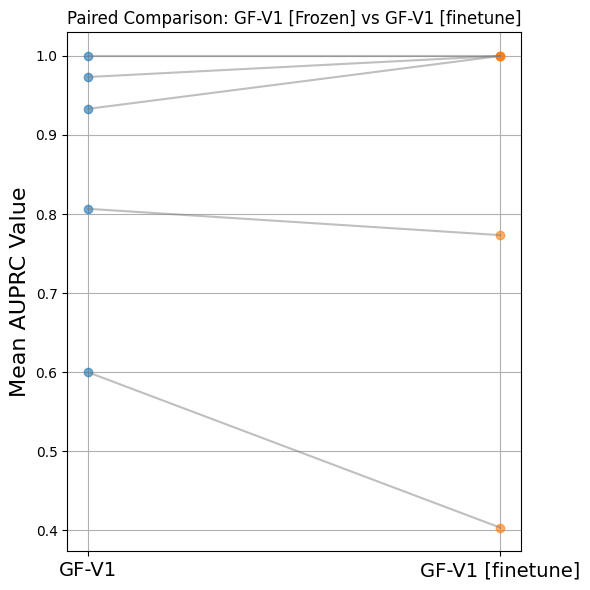

(4.0, 0.875)

In [129]:
compare_experiments(comapre_df, "GF-V1", "GF-V1 [finetune]")

/var/tmp/ipykernel_10387/2112654218.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([1, 2], [vals_a[i], vals_b[i]], color='gray', alpha=0.5)


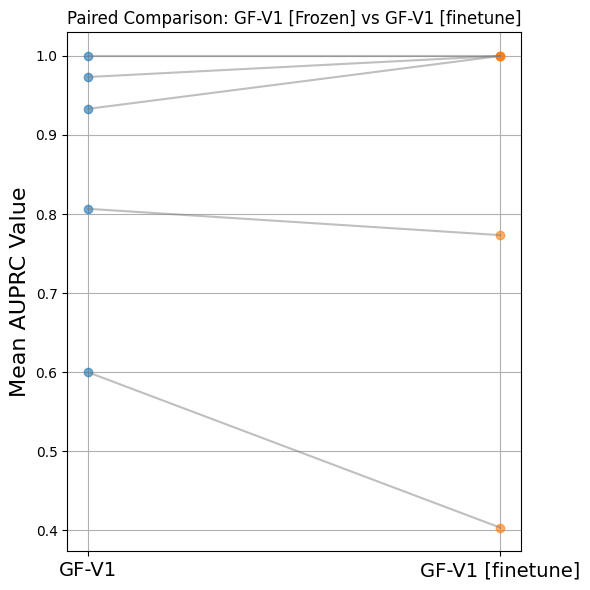

(4.0, 0.875)

In [130]:
compare_experiments(comapre_df, "GF-V1", "GF-V1 [finetune]")

/var/tmp/ipykernel_10387/2112654218.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([1, 2], [vals_a[i], vals_b[i]], color='gray', alpha=0.5)


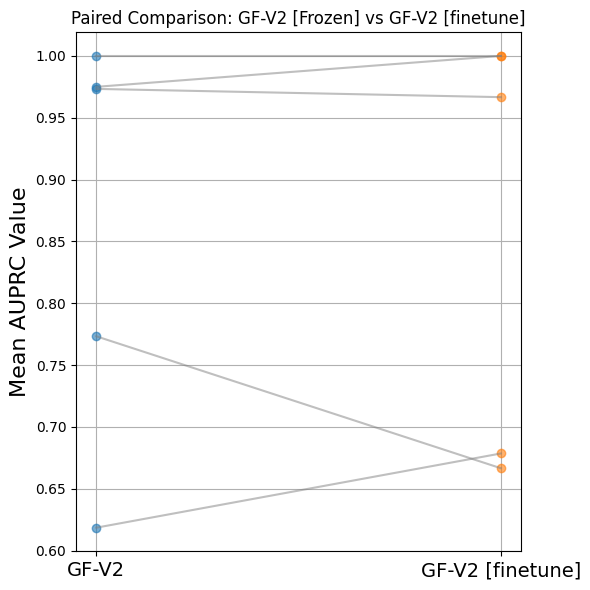

(5.0, 1.0)

In [131]:
compare_experiments(comapre_df, "GF-V2", "GF-V2 [finetune]")

/var/tmp/ipykernel_24299/2112654218.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([1, 2], [vals_a[i], vals_b[i]], color='gray', alpha=0.5)


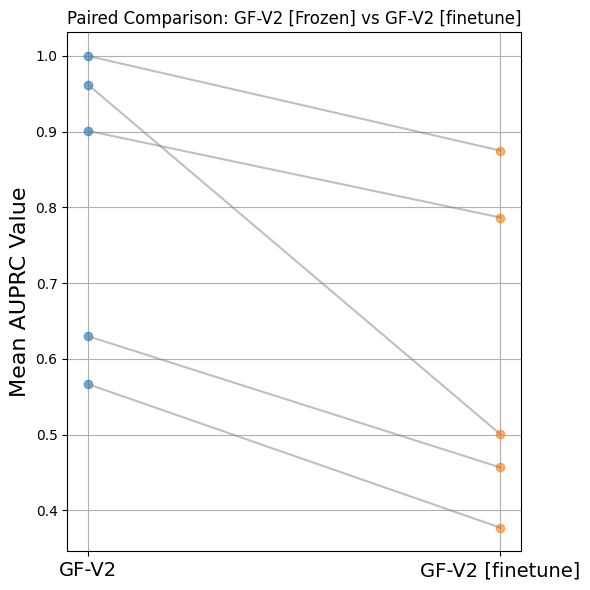

(0.0, 0.0625)

In [119]:
compare_experiments(comapre_df, "GF-V2", "GF-V2 [finetune]")